<a href="https://colab.research.google.com/github/Vimp17/py/blob/main/GANs_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import numpy as np
import matplotlib.pyplot as plt

In [6]:
epochs = 150
lr = 2e-4
batch_size = 64
loss = nn.BCELoss()

# Model
G = generator().to(device)
D = discriminator().to(device)

G_optimizer = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
D_optimizer = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))


"""
Image transformation and dataloader creation
Note that we are training generation and not classification, and hence
only the train_loader is loaded
"""
# Transform
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Load data
train_set = datasets.MNIST('mnist/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 38.8MB/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.36MB/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 9.17MB/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.95MB/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
class discriminator(nn.Module):
    def __init__(self):
        super(discriminator, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 1)
        self.activation = nn.LeakyReLU(0.1)
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return nn.Sigmoid()(x)
class generator(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        self.fc1 = nn.Linear(128, 1024)
        self.fc2 = nn.Linear(1024, 2048)
        self.fc3 = nn.Linear(2048, 784)
        self.activation = nn.ReLU()
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        x = x.view(-1, 1, 28, 28)
        return nn.Tanh()(x)

In [7]:
for epoch in range(epochs):
    for idx, (imgs, _) in enumerate(train_loader):
        idx += 1
        # Обучаем дискриминатор
        # real_inputs - изображения из набора данных MNIST
        # fake_inputs - изображения от генератора
        # real_inputs должны быть классифицированы как 1, а fake_inputs - как 0
        real_inputs = imgs.to(device)
        real_outputs = D(real_inputs)
        real_label = torch.ones(real_inputs.shape[0], 1).to(device)
        noise = (torch.rand(real_inputs.shape[0], 128) - 0.5) / 0.5
        noise = noise.to(device)
        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)
        fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device)
        outputs = torch.cat((real_outputs, fake_outputs), 0)
        targets = torch.cat((real_label, fake_label), 0)
        D_loss = loss(outputs, targets)
        D_optimizer.zero_grad()
        D_loss.backward()
        D_optimizer.step()
        # Обучаем генератор
        # Цель генератора получить от дискриминатора 1 по всем изображениям
        noise = (torch.rand(real_inputs.shape[0], 128)-0.5)/0.5
        noise = noise.to(device)
        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)
        fake_targets = torch.ones([fake_inputs.shape[0], 1]).to(device)
        G_loss = loss(fake_outputs, fake_targets)
        G_optimizer.zero_grad()
        G_loss.backward()
        G_optimizer.step()
        if idx % 100 == 0 or idx == len(train_loader):
            print('Epoch {} Iteration {}: discriminator_loss {:.3f} generator_loss {:.3f}'.format(epoch, idx, D_loss.item(), G_loss.item()))
    if (epoch+1) % 10 == 0:
        torch.save(G, 'Generator_epoch_{}.pth'.format(epoch))
        print('Model saved.')


Epoch 0 Iteration 100: discriminator_loss 0.725 generator_loss 0.806
Epoch 0 Iteration 200: discriminator_loss 0.670 generator_loss 0.812
Epoch 0 Iteration 300: discriminator_loss 0.672 generator_loss 0.731
Epoch 0 Iteration 400: discriminator_loss 0.651 generator_loss 0.768
Epoch 0 Iteration 500: discriminator_loss 0.531 generator_loss 0.881
Epoch 0 Iteration 600: discriminator_loss 0.456 generator_loss 1.003
Epoch 0 Iteration 700: discriminator_loss 0.431 generator_loss 1.055
Epoch 0 Iteration 800: discriminator_loss 0.554 generator_loss 0.785
Epoch 0 Iteration 900: discriminator_loss 0.485 generator_loss 1.128
Epoch 0 Iteration 938: discriminator_loss 0.503 generator_loss 1.354
Epoch 1 Iteration 100: discriminator_loss 0.506 generator_loss 1.144
Epoch 1 Iteration 200: discriminator_loss 0.398 generator_loss 1.310
Epoch 1 Iteration 300: discriminator_loss 0.414 generator_loss 1.536
Epoch 1 Iteration 400: discriminator_loss 0.480 generator_loss 0.995
Epoch 1 Iteration 500: discriminat

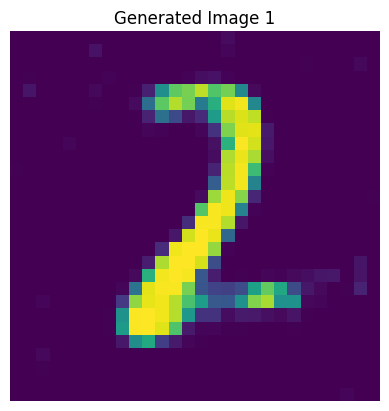

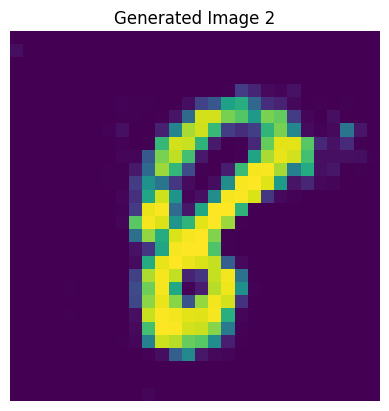

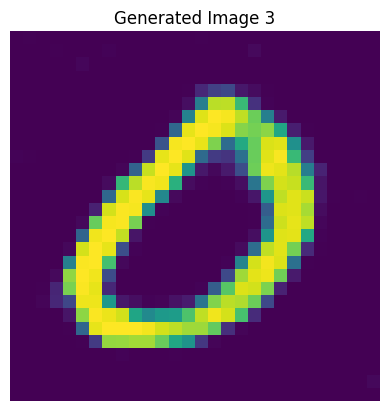

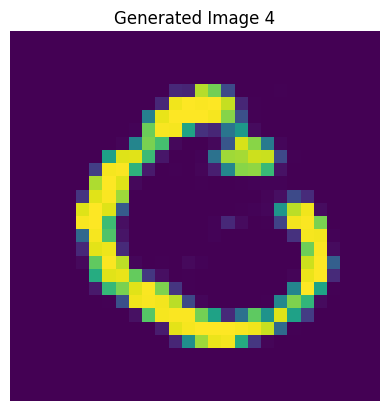

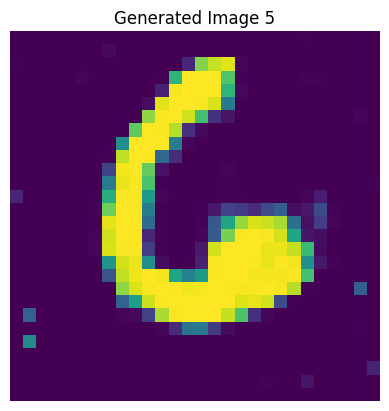

In [8]:
import matplotlib.pyplot as plt
import torch

# Генерация шума и создание "фейковых" данных
noise = (torch.rand(real_inputs.shape[0], 128) - 0.5) / 0.5
fake_inputs = G(noise)

# Проверка, если fake_inputs представляет собой изображения
# Предполагается, что G возвращает тензор размерности [batch_size, channels, height, width]
if fake_inputs.dim() == 4:  # Проверка на тензор изображения
    batch_size = fake_inputs.shape[0]
    for i in range(min(5, batch_size)):  # Отображаем до 5 изображений
        img = fake_inputs[i].detach().cpu().numpy().transpose(1, 2, 0)  # Перевод в (H, W, C)
        img = (img - img.min()) / (img.max() - img.min())  # Нормализация для визуализации

        plt.figure()
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Generated Image {i + 1}")
    plt.show()
else:
    print("Output is not an image tensor.")
